In [1]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

In [46]:
from Simulation import *

env, observations_probabilities = generate_new_environment()

In [ ]:
from Network import *
Network.print_graph(env.get_network().G)

In [48]:
ecommerce = Ecommerce(B_cap, budgets, product_prices, observations_probabilities)

In [49]:
exp_clicks = env.estimate_expected_user_alpha(ecommerce.budgets / ecommerce.B_cap)
optimal_allocation = ecommerce.solve_optimization_problem(
    env.get_network().get_adjacency_matrix(), env.get_num_items_sold(), env.get_users_reservation_prices(), exp_clicks)


optimal solution found is: [40.  0. 40. 60.  0.]


In [50]:
np.sum(env.users_alpha, axis=0)[1:]

array([0.1348426 , 0.21376797, 0.20802861, 0.10482399, 0.14145441])

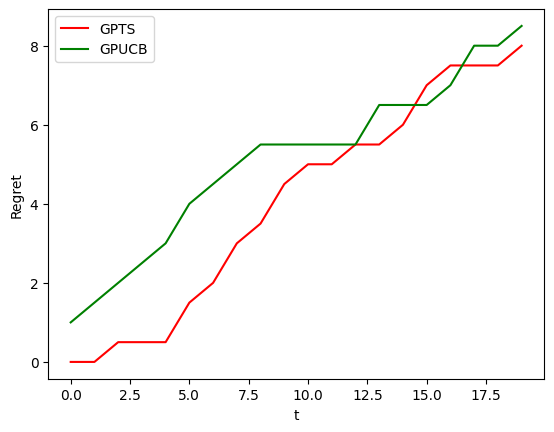

In [83]:
gpucb_rewards_per_experiment = []
gpts_rewards_per_experiment = []

for e in tqdm(range(0, 2), position=0, desc="n_experiment", leave=False):
    env, observations_probabilities = generate_new_environment()

    ecomm5_gpts = Ecommerce5_GPTS(
        B_cap, budgets, product_prices, observations_probabilities)
    ecomm5_ucb = Ecommerce5_UCB(
        B_cap, budgets, product_prices, observations_probabilities)

    for t in tqdm(range(0, 20), position=1, desc="n_iteration", leave=False):
        arm, arm_idx = ecomm5_ucb.pull_arm()
        reward = env.round_step5(arm)
        ecomm5_ucb.update(arm_idx, reward)

        arm, arm_idx = ecomm5_gpts.pull_arm()
        reward = env.round_step5(arm)
        ecomm5_gpts.update(arm_idx, reward)

    gpucb_rewards_per_experiment.append(ecomm5_ucb.collected_rewards)
    gpts_rewards_per_experiment.append(ecomm5_gpts.collected_rewards)

opt = np.max(env.get_network().get_adjacency_matrix())

gpts_regret = np.cumsum(
    np.mean(opt - gpucb_rewards_per_experiment, axis=0))
gpucb_regret = np.cumsum(
    np.mean(opt - gpts_rewards_per_experiment, axis=0))

plot_regrets(gpts_regret, gpucb_regret)

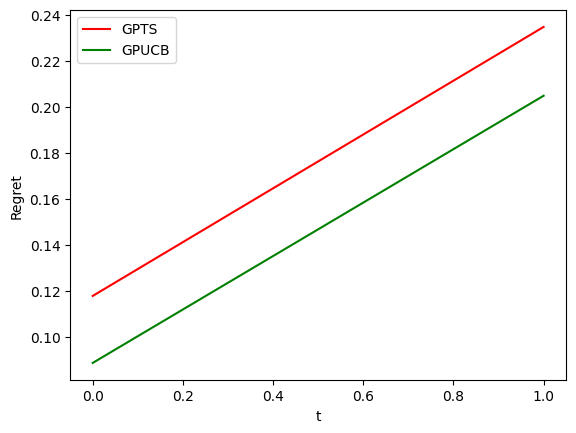

In [85]:
gpucb_rewards_per_experiment = []
gpts_rewards_per_experiment = []

for e in tqdm(range(0, 2), position=0, desc="n_experiment", leave=False):
    env, observations_probabilities = generate_new_environment()

    ecomm3_gpts = Ecommerce3_TS(
        B_cap, budgets, product_prices, observations_probabilities)
    ecomm3_ucb = Ecommerce3_UCB(
        B_cap, budgets, product_prices, observations_probabilities)

    for t in tqdm(range(0, 10), position=1, desc="n_iteration", leave=False):
        arm = ecomm3_ucb.pull_arm()
        reward = env.round_step3(arm)
        ecomm3_ucb.update(arm, reward)

        arm = ecomm3_gpts.pull_arm()
        reward = env.round_step3(arm)
        ecomm3_gpts.update(arm, reward)

    gpucb_rewards_per_experiment.append(ecomm3_ucb.collected_rewards)
    gpts_rewards_per_experiment.append(ecomm3_gpts.collected_rewards)

opt = opt = np.sum(env.get_users_alpha(), axis=0)[1:]
# this np.mean is used to compute the average regret for each "product" -> output shape = (n_experiments x NUM_OF_PRODUCTS)

gpts_regret_superarm = opt - np.mean(np.array(gpucb_rewards_per_experiment), axis=0).T
gpucb_regret_superarm = opt - np.mean(np.array(gpts_rewards_per_experiment), axis=0).T 

gpts_regret_per_round = np.sum(gpts_regret_superarm, axis = 1)
gpucb_regret_per_round = np.sum(gpucb_regret_superarm, axis=1) 

# # this np.mean before of the cumsum is to average over all the products
gpts_regret = np.cumsum(gpts_regret_per_round)
gpucb_regret = np.cumsum(gpucb_regret_per_round)

plot_regrets(gpts_regret, gpucb_regret)

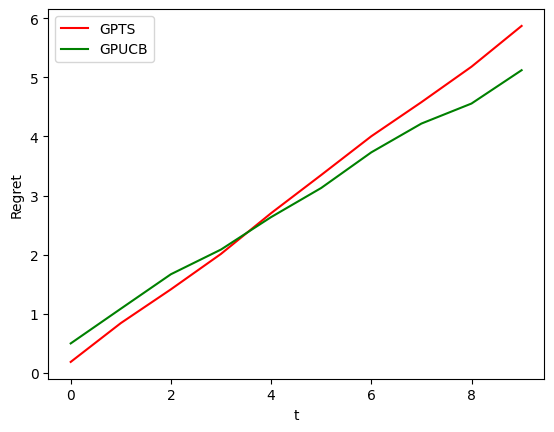

In [108]:

opt = opt = np.sum(env.get_users_alpha(), axis=0)[1:]
# this np.mean is used to compute the average regret for each "product" -> output shape = (n_experiments x NUM_OF_PRODUCTS)

gpts_regret_superarm = opt - np.mean(np.array(gpucb_rewards_per_experiment), axis=0).T
gpucb_regret_superarm = opt - np.mean(np.array(gpts_rewards_per_experiment), axis=0).T 

gpts_regret_per_round = np.sum(gpts_regret_superarm, axis = 1)
gpucb_regret_per_round = np.sum(gpucb_regret_superarm, axis=1) 

# # this np.mean before of the cumsum is to average over all the products
gpts_regret = np.cumsum(gpts_regret_per_round)
gpucb_regret = np.cumsum(gpucb_regret_per_round)

plot_regrets(gpts_regret, gpucb_regret)